In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os 
import glob 
import pathlib
import Library.process_data_saxs as pds
import Library.plot_saxs_curves as ps
import Library.save_saxs_data as ssd

Enter the path to the directory where you saved your data: <br>
    -the order of the files has to be like this:<br>
        1-Empty capillary<br>
        2-Solvent<br>
        3-Empty beam<br>
        4-Your samples

CHECK THE SAMPLES POSITION AND INDEX FOR BACKGROUND SUBSTRACTION
0 01.empty_10800s_unwarped_exported.dat_counts
1 02.PBS_10800s_unwarped_exported.dat_counts
2 03.emptybeam_10800s_unwarped_exported.dat_counts
3 LNP_HSA_diluted_1_10_10800s_unwarped_exported.dat_counts
4 LNP_HSA_diluted_1_2_10800s_unwarped_exported.dat_counts


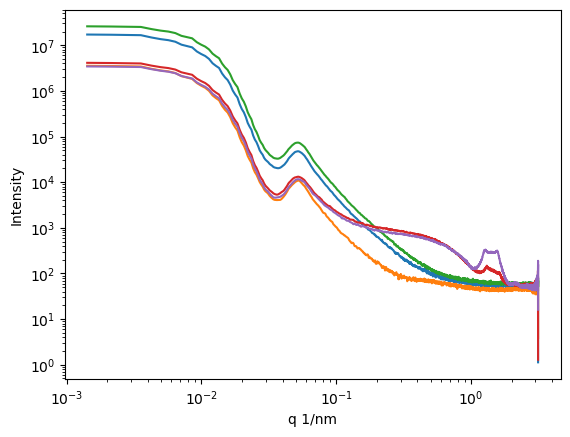

In [7]:
path = r'C:\Users\krim\Desktop\10800s'
path= pathlib.PureWindowsPath(path).as_posix()+'/'
qdata,idata,err_data, B, sample_name = pds.import_scattering_data(path,plot = True)

Transmission correction

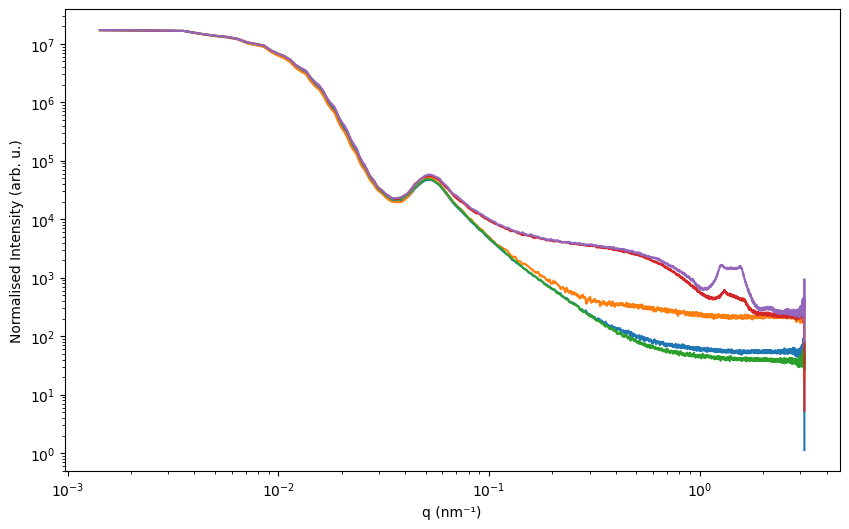

In [4]:
idata_corrected, transmission_data, err_corrected = pds.transmission_correction(idata, err_data)
ps.plot_scattering_curves(qdata, idata_corrected, ylabel = 'Normalised Intensity (arb. u.)')

Background subtraction:<br>
    You can average your data by turning the function argument averaging to True.<br>
    bck_coef has to be a list even if you have only one value.

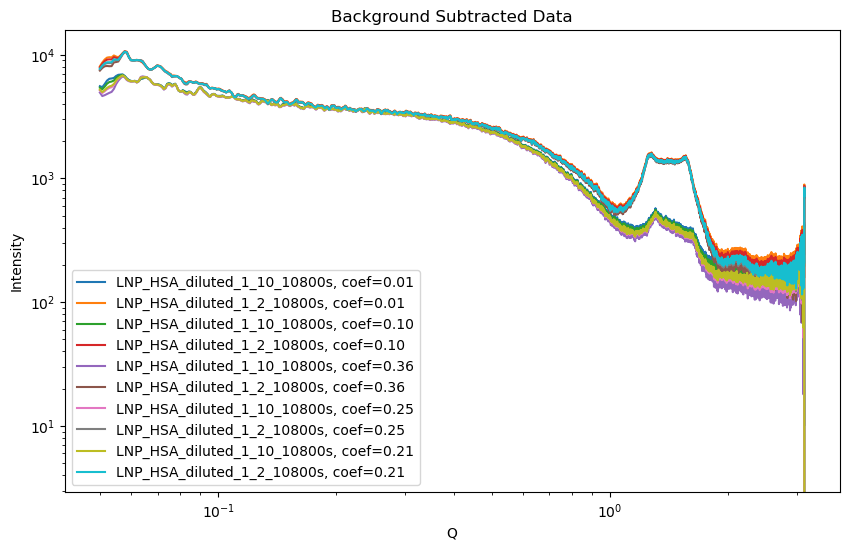

In [5]:
Qdata, Idata,Err, sname,bck_coef,avg =  pds.background_subtraction(idata_corrected,err_corrected,qdata,sample_name,averaging=False, air = 0, capillary = 1 ,water = 2, bck_coef = [0.01,0.1,0.365,0.25,0.214], q_lim = 147)


Save data in the same directory

In [6]:
if (avg):
    ssd.save_1D_average_data(path,sname,Qdata,Idata,Err)
else:
    ssd.save_1D_data(path, sname, Qdata, Idata, Err)

1D data have been saved at: C:/Users/krim/Desktop/10800s/1D
